# Traffic Accident Prediction

# Data Loading

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('dataset_traffic_accident_prediction1.csv')

## Exploratory Data Analysis

In [5]:
df.shape

(840, 14)

In [7]:
df.size

11760

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [10]:
df.describe()

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.001253,71.050125,3.286967,0.160401,43.259398,38.981203,0.299499
std,0.784894,32.052458,2.017267,0.367208,15.129856,15.273201,0.458326
min,0.000000,30.000000,1.000000,0.000000,18.000000,9.000000,0.000000
25%,0.000000,50.000000,2.000000,0.000000,30.000000,26.000000,0.000000
50%,1.000000,60.000000,3.000000,0.000000,43.000000,39.000000,0.000000
75%,2.000000,80.000000,4.000000,0.000000,56.000000,52.750000,1.000000
max,2.000000,213.000000,14.000000,1.000000,69.000000,69.000000,1.000000


In [13]:
df.isnull().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


In [12]:
df.isna().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


In [16]:
df.duplicated().sum()

14

In [17]:
df.nunique()

,0
Weather,5
Road_Type,4
Time_of_Day,4
Traffic_Density,3
Speed_Limit,24
Number_of_Vehicles,10
Driver_Alcohol,2
Accident_Severity,3
Road_Condition,4
Vehicle_Type,4


## Data Visualization

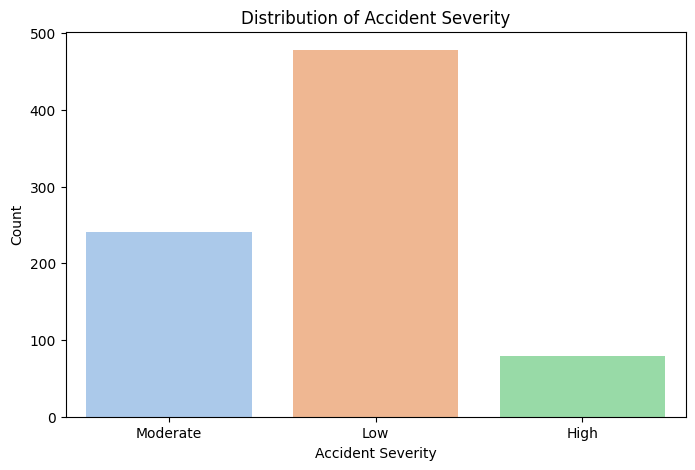

In [41]:
# Distribution of Accident Severity

plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', data=df, palette='pastel')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

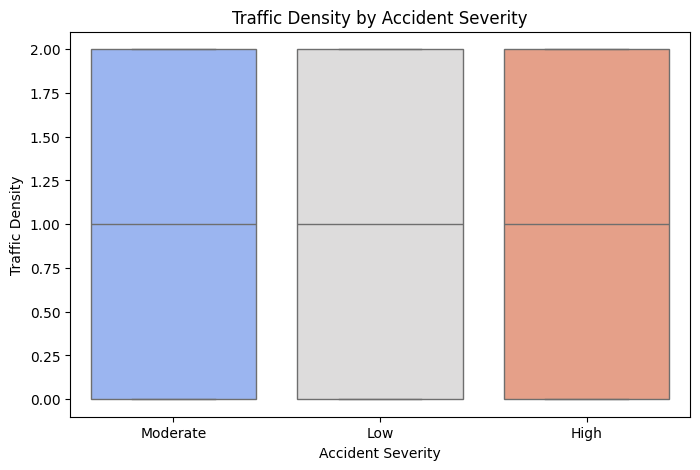

In [42]:
# Traffic Density vs. Accident Severity

plt.figure(figsize=(8, 5))
sns.boxplot(x='Accident_Severity', y='Traffic_Density', data=df, palette='coolwarm')
plt.title('Traffic Density by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Traffic Density')
plt.show()

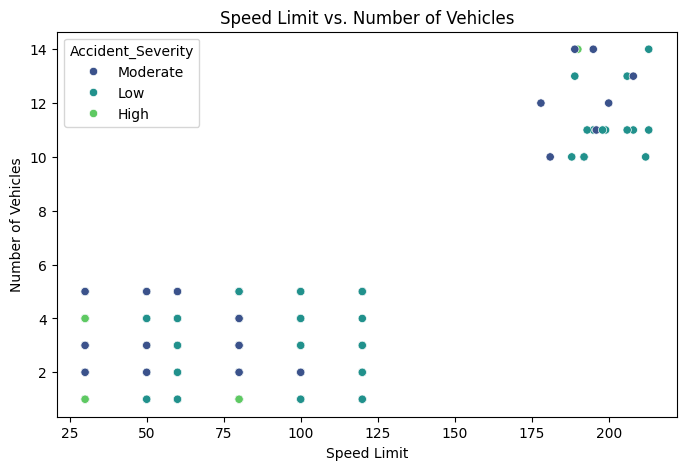

In [43]:
# Speed Limit vs. Number of Vehicles

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Speed_Limit', y='Number_of_Vehicles', hue='Accident_Severity', data=df, palette='viridis')
plt.title('Speed Limit vs. Number of Vehicles')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Vehicles')
plt.show()

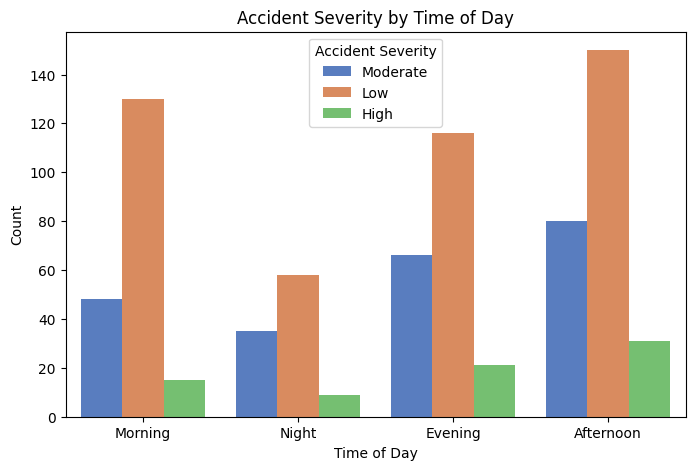

In [44]:
# Accident Severity by Time of Day

plt.figure(figsize=(8, 5))
sns.countplot(x='Time_of_Day', hue='Accident_Severity', data=df, palette='muted')
plt.title('Accident Severity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

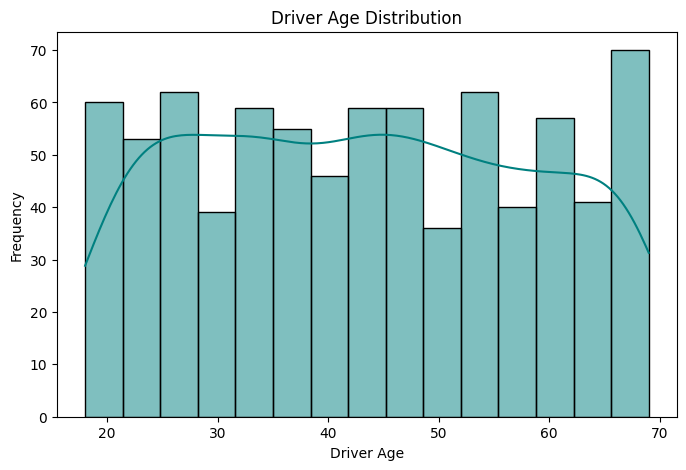

In [45]:
# Driver Age Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['Driver_Age'], bins=15, kde=True, color='teal')
plt.title('Driver Age Distribution')
plt.xlabel('Driver Age')
plt.ylabel('Frequency')
plt.show()

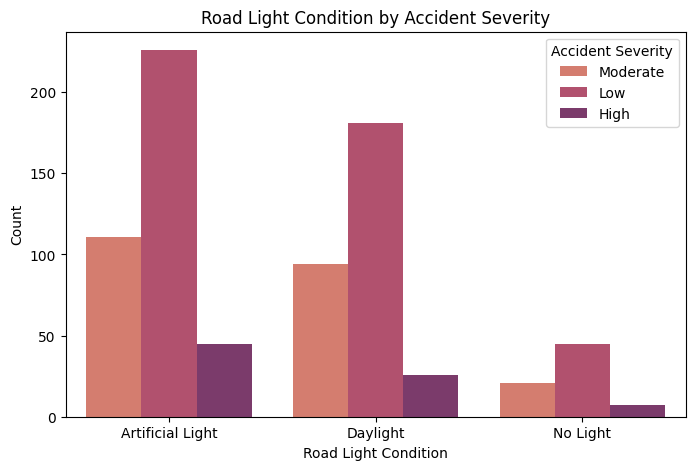

In [46]:
# Road Light Condition vs. Accident Severity

plt.figure(figsize=(8, 5))
sns.countplot(x='Road_Light_Condition', hue='Accident_Severity', data=df, palette='flare')
plt.title('Road Light Condition by Accident Severity')
plt.xlabel('Road Light Condition')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

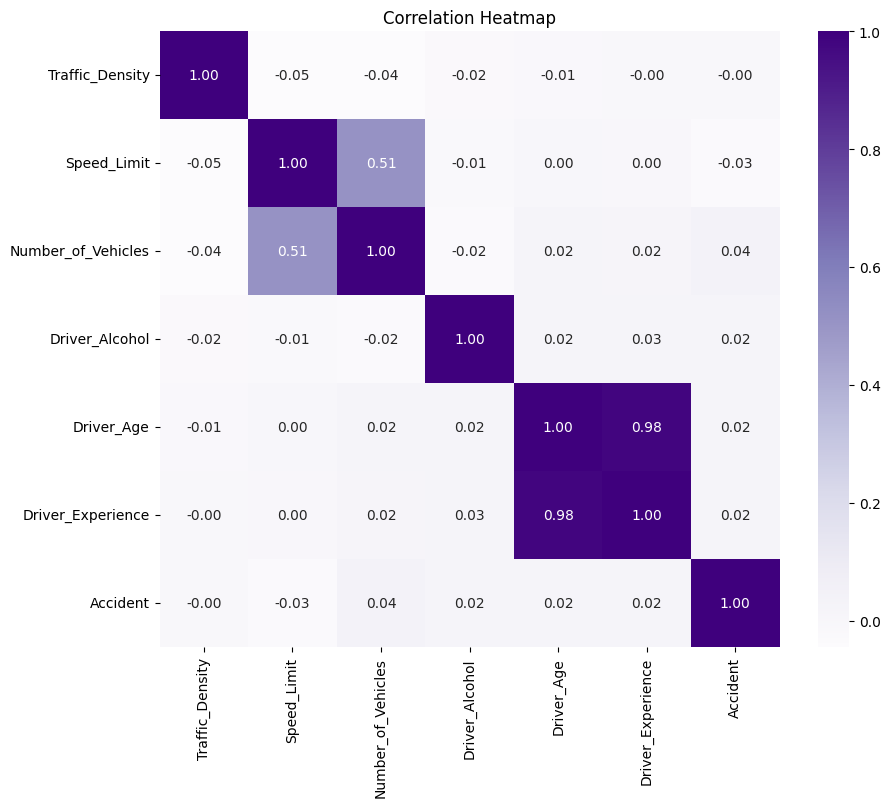

In [48]:
# Correlation Heatmap (Numerical Columns)

plt.figure(figsize=(10, 8))
correlation_matrix = df[['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 'Driver_Alcohol', 'Driver_Age', 'Driver_Experience', 'Accident']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Data Cleaning & Preprocessing

In [26]:
# Replacing null values with median and mode

df['Traffic_Density'].fillna(df['Traffic_Density'].median(), inplace=True)
df['Speed_Limit'].fillna(df['Speed_Limit'].median(), inplace=True)
df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].median(), inplace=True)
df['Driver_Alcohol'].fillna(df['Driver_Alcohol'].median(), inplace=True)
df['Driver_Age'].fillna(df['Driver_Age'].median(), inplace=True)
df['Driver_Experience'].fillna(df['Driver_Experience'].median(), inplace=True)
df['Accident'].fillna(df['Accident'].median(), inplace=True)

df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Accident_Severity'] = df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0])
df['Road_Condition'] = df['Road_Condition'].fillna(df['Road_Condition'].mode()[0])
df['Vehicle_Type'] = df['Vehicle_Type'].fillna(df['Vehicle_Type'].mode()[0])
df['Road_Light_Condition'] = df['Road_Light_Condition'].fillna(df['Road_Light_Condition'].mode()[0])

In [27]:
# Dropping duplicate values

df = df.drop_duplicates()

In [28]:
# OHE

df = pd.get_dummies(df, columns=['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity',
                                  'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition'], drop_first=True)

In [29]:
df['Age_vs_Experience'] = df['Driver_Age'] - df['Driver_Experience']
df = df.drop(['Driver_Age', 'Driver_Experience'], axis = 1)

In [30]:
X = df.drop(['Accident'], axis = 1)
y = df['Accident']

In [31]:
# Robust Scaler

numeric_columns = ['Speed_Limit', 'Number_of_Vehicles', 'Age_vs_Experience']

scaler = RobustScaler()

X_scaled = X.copy()
X_scaled[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [32]:
# Train test and split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=100)

## Model Building

In [37]:
knn_classifier = KNeighborsClassifier()

param_knn = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': range(10, 50, 5)}

grid_search_knn = GridSearchCV(knn_classifier, param_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': range(10, 50, 5),
                         'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']})

In [38]:
best_gs_knn = grid_search_knn.best_estimator_

print('Score on train data = ', round(best_gs_knn.score(X_train, y_train), 4))
print('Score on test data = ', round(best_gs_knn.score(X_test, y_test), 4))

Score on train data =  0.7127
Score on test data =  0.7132
